Dataset Shape: (3333, 11)
   churn  accountweeks  contractrenewal  dataplan  datausage  custservcalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   daymins  daycalls  monthlycharge  overagefee  roammins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  

Missing Values:
 churn              0
accountweeks       0
contractrenewal    0
dataplan           0
datausage          0
custservcalls   

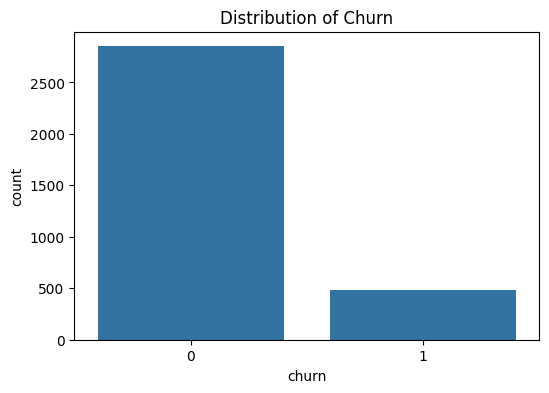

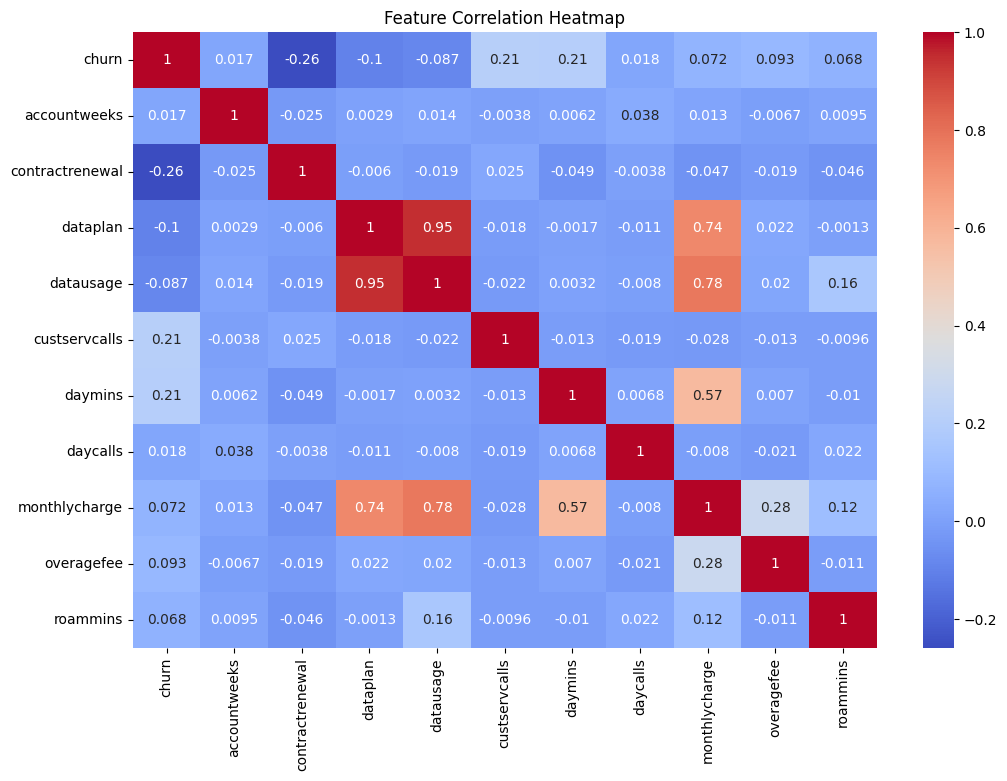


Model: LogisticRegression
Accuracy: 0.8591
Precision: 0.6207
Recall: 0.1782
AUC-ROC Score: 0.5794

Confusion Matrix:
 [[555  11]
 [ 83  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667


Model: RandomForestClassifier
Accuracy: 0.9250
Precision: 0.8493
Recall: 0.6139
AUC-ROC Score: 0.7972

Confusion Matrix:
 [[555  11]
 [ 39  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.85      0.61      0.71       101

    accuracy                           0.93       667
   macro avg       0.89      0.80      0.83       667
weighted avg       0.92      0.93      0.92       667


Model: 

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('telecom_churn.csv')

# Quick glimpse of the dataset
print("Dataset Shape:", data.shape)
print(data.head())

# 1. Data Preprocessing & EDA

# Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Replacing any missing values (if any) with the median
data.fillna(data.median(), inplace=True)

# Summary statistics of the dataset
print("\nDataset Summary:\n", data.describe())

# Visualizing the distribution of the target variable 'churn'
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.show()

# Checking correlation between features using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2. Feature Engineering
# ----------------------------------

# Dropping irrelevant features (if any)
# For instance, we could drop features with too much correlation or those that are not useful
# Here we are keeping all features for simplicity, but adjust as necessary

# Creating the feature matrix X and the target vector y
X = data.drop(['churn'], axis=1)
y = data['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (to bring them to the same scale)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Model Selection & Training
# ----------------------------------

# Initializing models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Training Logistic Regression model
logreg.fit(X_train, y_train)

# Training Random Forest model
rf.fit(X_train, y_train)

# Training XGBoost model
xgb.fit(X_train, y_train)

# 4. Model Evaluation
# ----------------------------------

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC-ROC Score: {auc:.4f}")
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluating all models
evaluate_model(logreg, X_test, y_test)
evaluate_model(rf, X_test, y_test)
evaluate_model(xgb, X_test, y_test)

